# Исследование объявлений о продаже квартир

<font size = 4> **Описание проекта**
        
Заказчик предоставил данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир (или аппартаментов) в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
    
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма и т.д.).   

<font size = 4> **Цель проекта**
    
Клиенту нужно научиться определять рыночную стоимость объектов недвижимости.   
Наша задача — установить, необходимые для этого, параметры квартиры (или аппартаментов), а также найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

**Для достижения цели проекта:**
    
* Определим факторы (параметры), оказывающие наибольшее влияние на общую (полную) стоимость объекта недвижимости. Для этого может потребоваться создать (сгенерировать) "новые" параметры квартиры (или аппартаментов).
    
* Оценим скорость продажи квартиры.

* Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.  
    
* Опишем, как стоимость объектов зависит от расстояния до центра города.  

<font size = 4> **План проекта**   
    
**1.  Изучение данных**  
    
1.1  Импортируем библиотеки.  
1.2  Считываем данные из CSV-файла в датафрейм и сохраняем в переменную.  
1.3  Выводим основную информацию о датафрейме методом info.   
1.4  Постройм общую гистограмму для всех числовых столбцов таблицы.   
    
**2.  Предобработка данных**
    
2.1  Изменим типы данных.     
2.2  Обработаем аномальные значения.     
2.3  Заполним пропущенные значения.     
2.4  Найдём и обработаем дубликаты.  
    
**3.  Добавление в таблицу новых столбцов (дополнительных параметров объекта недвижимости)**      
    
3.1  Добавим в таблицу цену одного квадратного метра недвижимости.   
3.2  Добавим в таблицу день недели, месяц и год публикации объявления.   
3.3  Добавим в таблицу тип этажа квартиры (значения — «первый», «последний», «другой»).   
3.4  Добавим в таблицу расстояние до центра города в километрах.   
    
**4.  Исследовательский анализ данных**    
    
4.1  Рассмотрим некоторые из параметров подробнее.  
4.2  Рассмотрим факторы наиболее всего влияющие на стоимость объекта.  
4.3  Изучим, как быстро продавались квартиры.    
4.4  Найдем населенные пункты с самой высокой и низкой стоимостью квадратного метра недвижимости.  
4.5  Найдем зависимость стоимости жилья от расстояния до центра города Санкт-Петербург.    
    
**5.  Итоговый вывод**     

## Изучение данных 

### Импортируем библиотеки.

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

### Считываем данные из CSV-файла в датафрейм и сохраняем в переменную.

In [2]:
# Чтение файла с данными и сохранение в df (используя разделитель \t)
try:
    df = pd.read_csv('d:/Data_science/Projects_jupiter/data/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# Увеличение лимита отображаемых столбцов для того, чтобы было видно всю таблицу
pd.set_option('display.max_columns', None)
# Получение первых 10 строк таблицы df
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Описание данных**
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

### Выводим основную информацию о датафрейме методом `info`. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Постройм общую гистограмму для всех числовых столбцов таблицы.

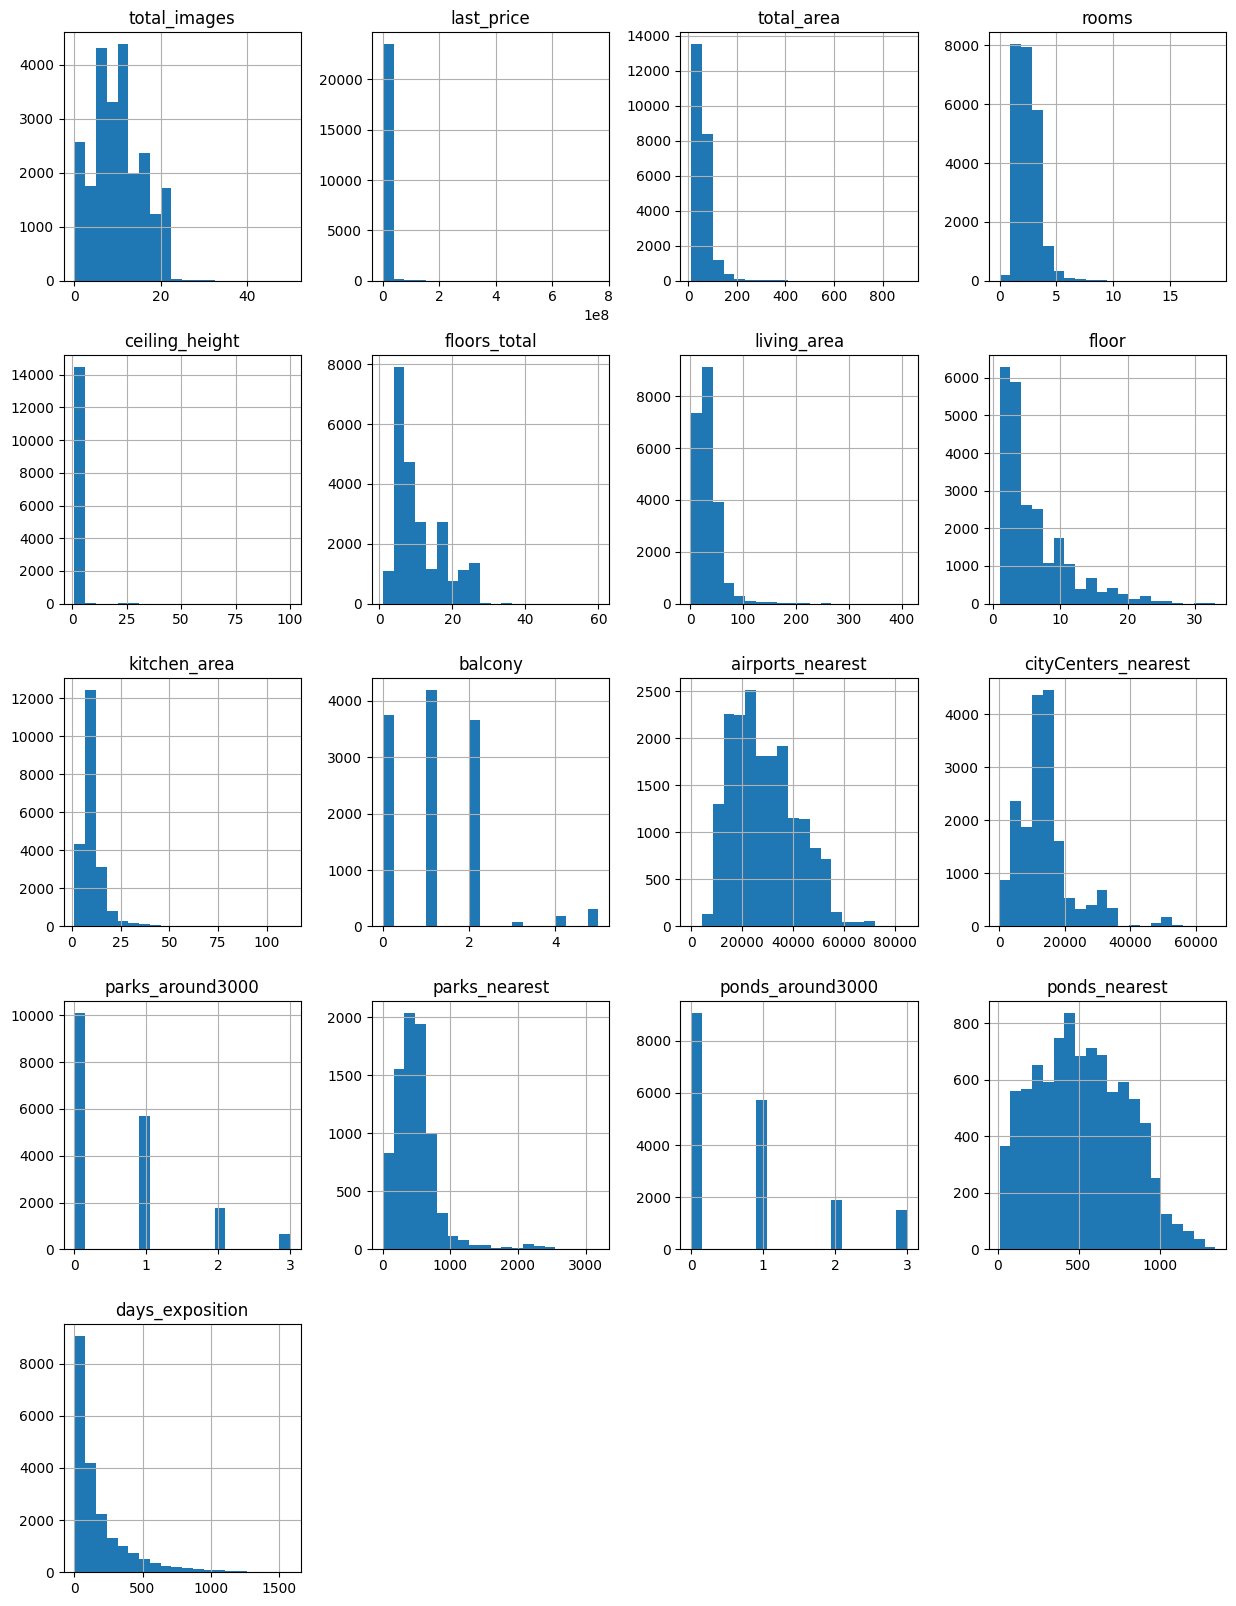

In [5]:
df.hist(figsize=(15,20), bins=20);

**Вывод:**  

На первом этапе проекта мы видим, что наш датафрейм состоит из 22 колонок и 23699 строк, в нем довольно много пропусков. На гистограммах мы видим как распределяются числовые данные.

## Предобработка данных

### Преобразуем типы данных.
Некоторые типы данных нужнно изменить для удобства работы с ними.

In [6]:
# Изменение типа данных на целочисленный
df['last_price'] = df['last_price'].astype(int)
# Изменение типа данных на целочисленный игнорируя пропуски в данных
df['floors_total'] = pd.to_numeric(df['floors_total'], errors='coerce').astype('Int32')
df['balcony'] = pd.to_numeric(df['balcony'], errors='coerce').astype('Int32')
df['parks_around3000'] = pd.to_numeric(df['parks_around3000'], errors='coerce').astype('Int32')
df['ponds_around3000'] = pd.to_numeric(df['ponds_around3000'], errors='coerce').astype('Int32')
# Перевод данных в формат даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

### Обработаем аномальные значения.

#### Исследуем столбец `ceiling_height`.

In [7]:
# Вывод уникальных значений в порядке возрастания (вначале и в конце списка)
print(sorted(df.loc[df['ceiling_height'].notna(), 'ceiling_height'].unique())[:20])
print(sorted(df.loc[df['ceiling_height'].notna(), 'ceiling_height'].unique())[170:])

[1.0, 1.2, 1.75, 2.0, 2.2, 2.25, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55]
[8.0, 8.3, 10.3, 14.0, 20.0, 22.6, 24.0, 25.0, 26.0, 27.0, 27.5, 32.0, 100.0]


**Замечание:** Мы видим что в таблице имеются квартиры с аномально высокими и низкими потолками.   
Предположим, что в значениях 24, 25 и т.д. допущена ошибка (пропущена точка).
Заменим эти значения на более правдивые: 2.4, 2.5 и т.д.  
После этого отбросим строки с аномальными высотами потолков более 6 метров и ниже 2.2 метров.  

In [8]:
# Замена значений в столбце "ceiling_height"
df['ceiling_height'] = df['ceiling_height'].replace([22.6, 24, 25, 26, 27, 27.5, 32],
                                                    [2.26, 2.4, 2.5, 2.6, 2.7, 2.75, 3.2])
# Фильтрация датафрейма по значениям в столбце "ceiling_height"
df = df[((df['ceiling_height'] <= 6) & (df['ceiling_height'] > 2)) | df['ceiling_height'].isna()]
df.shape

(23677, 22)

**Замечание:** В процессе фильтрации удалили 22 строки (изначально было 23699) с аномальными значениями высот потолков.

#### Исследуем столбец `total_area`.

In [9]:
# Вывод уникальных значений в порядке возрастания и разбиение на группы для наглядности
df['total_area'].value_counts(bins=10).sort_index()

(11.111, 100.8]    21873
(100.8, 189.6]      1539
(189.6, 278.4]       180
(278.4, 367.2]        51
(367.2, 456.0]        18
(456.0, 544.8]        11
(544.8, 633.6]         4
(633.6, 722.4]         0
(722.4, 811.2]         0
(811.2, 900.0]         1
Name: total_area, dtype: int64

**Замечание:** Значения свыше 544,8 примем за выбросы. На наше исследование такое незначительное количество строк не должно повлиять.

In [10]:
# Удаление несколько строк с площадью свыше 544.8 
df = df.query('total_area <= 544.8')
df.shape

(23672, 22)

**Замечание:** В процессе фильтрации удалии 5 строк (до фильрации было 23677) с аномальными значениями площади недвижимости.

#### Исследуем столбцы `floors_total` и `floor`.
Проверим, есть ли ошибки в данных. Например, номер этажа, на котором находится квартира, больше общего числа этажей в доме.

In [11]:
# Проверка значений в двух столбцах на адекватность 
len(df[df['floors_total'] < df['floor']])

0

**Замечание:** Во всех строках таблицы номер этажа квартиры меньше общего числа этажей в доме. Данные соответствуют логике.

**Вывод:**  

В итоге мы обработали аномальные значения в столбце с высотой потолков и площадью недвижимости. Нам пришлось отбросить 27 строк. На дальнейший анализ это повлиять не должно.


### Обработаем пропуски.

In [12]:
# Вывод количества пропущенных значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9194
floors_total               86
living_area              1900
floor                       0
is_apartment            20900
studio                      0
open_plan                   0
kitchen_area             2274
balcony                 11502
locality_name              49
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15601
ponds_around3000         5508
ponds_nearest           14573
days_exposition          3175
dtype: int64

#### Заполним пропуски в столбцах `balcony`, `parks_around3000` и `ponds_around3000`.
Поставим на их место 0.  
Вероятнее всего пропуск в столбце `balcony` означает, что в данной квартире балконов нет.   
То же самое относится к информации о парках и прудах в радиусе 3000 м.  

In [13]:
# Заполнение пропущенных значений в столбцах нулём
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

#### Заполним пропуски в столбце `is_apartment`.

In [14]:
# Вывод уникальных значений столбца "is_apartment"
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

**Замечание:** Вероятнее всего `True` здесь означает, что эта недвижимость является аппартаментами, поэтому на место пропуска поставим `False`.

In [15]:
# Заполнение пропущенных значений в столбце "is_apartment" 
df['is_apartment'] = df['is_apartment'].fillna(False)

#### Заполним пропуски в столбце `ceiling_height`.
Вполне логично, что значения в этих столбце должны быть одинаковы для одних и тех же домов. Поэтому предположим, что можно заменить пропущенные данные из значений соответствующих одним и тем же многоквартирным домам.  

В данном случае посчитаем, что один и тот же дом будет находиться на одинаковом расстоянии от центра города и от аэропорта (вероятность, того что 2 разных дома окажутся на одинаковых расстояниях очень мала). Чтобы учесть погрешность измерения округлим значения в этих столбцах до 10 метров (маловероятно, что соседние дома располагаются ближе друг к другу).

In [16]:
# Округление значений в столбцах до десятков
df['airports_nearest'] = df['airports_nearest'].round(-1)
df['cityCenters_nearest'] = df['cityCenters_nearest'].round(-1)
# Склеивание значений столбцов, для того чтобы получить "координаты" дома
df['coordinates'] = df['airports_nearest'].astype(str) +'--' + df['cityCenters_nearest'].astype(str)
# Подсчёт получившихся координат домов, исключая данные с пропусками
len(df.loc[(df['airports_nearest'].notna()) & (df['cityCenters_nearest'].notna()),'coordinates'].unique())

8819

**Замечание:** Получилось 8819 домов.

In [17]:
# Заполнение пропусков в столбце с высотой потолков значениями медианы по домам (используя координаты)
for house in df.loc[(df['airports_nearest'].notna()) & (df['cityCenters_nearest'].notna()),'coordinates'].unique():
    df.loc[(df['coordinates'] == house) & (df['ceiling_height'].isna()), 'ceiling_height'] = \
    df.loc[(df['coordinates'] == house), 'ceiling_height'].median() 
# Подсчёт количества пропусков
df['ceiling_height'].isna().sum()

5253

**Замечание:** Сократили пропуски в столбце до 5253 строк. Оставшиеся пропуски заполним заглушкой.

In [18]:
# Округление высоты потолка до 0,01 м
df['ceiling_height'] = df['ceiling_height'].round(2)
# Заполнение пропусков заглушкой "no_info"
df['ceiling_height'] = df['ceiling_height'].fillna(value='no_info', inplace=False)

#### Исследуем и заполним пропуски в столбце `living_area` и `kitchen_area`.
Значения из столбцов `total_area`, `living_area` и `kitchen_area` нашего датафрейма должны быть взаимосвязанны. Так как в столбцах `living_area` и `kitchen_area` разное количество пропусков, проверим возможность заполнить некоторые из них. 

Проверим гипотезу: общая площадь недвижимости в наших данных равна сумме площадей жилой недвижимости и площади кухни (судя по предоставленным данным). Для этого удалим строки, в которых имеются пропуски в столбцах `living_area` и `kitchen_area`. После этого попробуем вычесть из общей площади значения жилой площади и площади кухни. Если гипотеза верна, то полученная средняя разность будет близка к 0.

In [19]:
# Округление площади жилья до 0,1 м
df['living_area'] = df['living_area'].round(1)
df['kitchen_area'] = df['kitchen_area'].round(1)
df['total_area'] = df['total_area'].round(1)
# Нахождение средней разности общей площади жилья и жилой полощади вместе с кухней 
df_check = df.loc[df['living_area'].notna() & df['kitchen_area'].notna()]
(df_check['total_area'] - df_check['living_area'] - df_check['kitchen_area'] ).mean()

15.341617366412214

In [20]:
# Нахождение средней общей площади жилья
df_check['total_area'].mean()

60.437671755725184

**Замечание:** В результате мы получили "среднее" значение большее 15, что довольно высоко (с учетом того, что средняя общая площадь недвижимости равна около 60 кв.м.). Делаем вывод, что мы не можем заполнить пропуски таким образом. Скорее всего в общую площадь также входит площадь санузла, балкона и, возможно, коридора.

Конечно, можно попытаться заполнить значения также как и высоту потолков (на основе координат дома). Например, в одном и том же доме квартира с одинаковой площадью должна иметь одинаковую планировку (жилую площадь и кухню). Однако, возможно, что собственник выполнил перепланировку жилья и наши предположения окажутся неверны. Чтобы не искажать реальную ситуацию при исследовании, не будем пытаться заменить значения в данных столбцах, а поставим на место пропусков заглушку.

In [21]:
# Заполнение пропусков заглушкой "no_info"
df['living_area'] = df['living_area'].fillna(value='no_info', inplace=False)
df['kitchen_area'] = df['kitchen_area'].fillna(value='no_info', inplace=False)

#### Заполним пропуски в столбцах `parks_nearest`, `ponds_nearest`, `airports_nearest`, `cityCenters_nearest` и `days_exposition`.
Картографические данные (расстояния) заполнить довольно трудно, лучше попробовать уточнить информацию у заказчика. В данном исследовании поставим на их место заглушку, чтобы не было исскажений.  
В столбце `days_exposition` пропуск, скорее всего, означает, что объявление еще не снято с публикации на момент выгрузки из базы. Однако, мы не знаем когда скачивалась наша информация и поэтому не сможем точно узнать сколько времени недвижимость продаётся. Чтобы не повлиять на точность исследования, поставим на место пропусков здесь такую же заглушку. 

In [22]:
# Округление количества дней публикации до целого числа
df['days_exposition'] = df['days_exposition'].round()
# Заполнение пропусков в  столбцах заглушкой "no_info"
df['parks_nearest'] = df['parks_nearest'].fillna(value='no_info', inplace=False)
df['ponds_nearest'] = df['ponds_nearest'].fillna(value='no_info', inplace=False)
df['airports_nearest'] = df['airports_nearest'].fillna(value='no_info', inplace=False)
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(value='no_info', inplace=False)
df['days_exposition'] = df['days_exposition'].fillna(value='no_info', inplace=False)

#### Рассмотрим пропуски в столбцах  `locality_name` и `floors_total`.
Так как строк с пропущенными значениями здесь довольно мало, то просто удалим их. 

In [23]:
# Удаление строк с пропущенными значениями в столбцах 
df = df[df['locality_name'].notna()]
df = df[df['floors_total'].notna()]
df.shape

(23538, 23)

**Замечание:** На данном этапе мы удалили 134 строки.

In [24]:
# Проверка таблицы на пропуски
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
coordinates             0
dtype: int64

**Вывод:**  

В процессе обработки пропусков нам пришлось удалить 161 строку. В большинстве случаев на место пропущенных значений нам  пришлось поставить заглушку `no_info`.

### Обработаем дубликаты.

#### Проверим наличие явных дубликатов.

In [25]:
# Поиск дубликатов
df.duplicated().sum() 

0

**Замечание:** Явных дубликатов не обнаружено.


#### Проверим наши данные на наличие неявных дубликатов.
Такие дубликаты могут быть в столбце с названием локации.

In [26]:
# Вывод количества уникальных значений
print('Всего уникальных значений:' ,len(df['locality_name'].unique()))
# Вывод всех уникальных значений
df['locality_name'].unique()

Всего уникальных значений: 364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Замечание:** Принимаем решение избавится в названиях локаций от их типов (деревня, посёлок и т.д.).
Для этого удаляем все слова написанные с маленькой буквы. Будем работать только с "именами" локаций (Колпино, Мурино и т.д.).

In [27]:
# Добавление в пустой список всех подряд (и по порядку) "имен" локаций написанных с большой буквы
loc_name = []
for name in df['locality_name'].str.split(" "):
    for word in name:
        if word.istitle():
            up_name = "".join(word)
    loc_name.append(up_name)
# Сохраниние в столбец с локацией всех значений из списка по порядку
df['locality_name'] = loc_name
# Вывод количества уникальных значений
print('Всего уникальных значений:' ,len(df['locality_name'].unique()))

Всего уникальных значений: 294


In [28]:
#Вывод всех уникальных значений в алфавитном порядке (для упрощения анализа)
sorted(df['locality_name'].unique()) 

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Бор',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Верево',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Вруда',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Горка',
 'Гостилицы',
 'Грива',
 'Громово',
 'Девяткино',
 'Дзержинского',
 'Долина',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Ижора',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',
 'Каложицы',
 'Кальтино',
 'Каменногорск',
 'Камышовка',
 'Кара',
 'Карлино',
 'Каськово',
 'К

**Вывод:** 

Нам удалось избавится от неявных дубликатов. Мы сократили количество уникальных значений в столбце с названиями локаций до 294 (на 70).
Можно заметить, что таким способом для каждого названия локации в результате остаётся только последнее слово из написанных с большой буквы. Но для нашего анализа этого достаточно.

## Добавление в таблицу новых столбцов (параметров недвижимости)
Для исследовательского анализа нам потребуются дополнительные параметры недвижимости.

### Добавим в таблицу цену одного квадратного метра недвижимости.

In [29]:
# Рассчёт цены квадратного метра жилья и запись значений в новый столбец
df['price_for_1m'] = (df['last_price'] / df['total_area']).round() 

### Добавим в таблицу день недели, месяц и год  публикации объявления. 
День недели будем описывать так:  
 * 0 - понедельник,    
 * 1 - вторник,   
 * ...  
 * 6 - воскресенье.

In [30]:
# Извлечение дня недели, месяца и года из столбца с датой публикации объявления
df['week_day'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year 

### Добавим в таблицу тип этажа квартиры (значения — «первый», «последний», «другой»).

In [31]:
# Запись значений в новый столбец в зависимости от выполняемых условий
df['floor_type'] = 'другой'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'последний'
df.loc[df['floor'] == 1, 'floor_type'] = 'первый'

### Добавим в таблицу расстояние до центра города в километрах. 

In [32]:
# Добавление в пустой список рассчетных значений в зависимости от условий
dist_km = []
for info in df['cityCenters_nearest']:
    if isinstance(info, float):
        result = round(info / 1000)
    else:
        result = 'no_info'
    dist_km.append(result)
# Запись в новый столбец значений из полученного списка
df['cityCenters_nearest_km'] = dist_km

In [33]:
# Вывод первых 5 строк таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coordinates,price_for_1m,week_day,month,year,floor_type,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18860.0,16030.0,1,482.0,2,755.0,no_info,18860.0--16030.0,120370.0,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,no_info,11,18.6,1,False,False,False,11.0,2,Шушары,12820.0,18600.0,0,no_info,0,no_info,81.0,12820.0--18600.0,82921.0,1,12,2018,первый,19
2,10,5196000,56.0,2015-08-20,2,no_info,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21740.0,13930.0,1,90.0,2,574.0,558.0,21740.0--13930.0,92786.0,3,8,2015,другой,14
3,0,64900000,159.0,2015-07-24,3,3.0,14,no_info,9,False,False,False,no_info,0,Санкт-Петербург,28100.0,6800.0,2,84.0,3,234.0,424.0,28100.0--6800.0,408176.0,4,7,2015,другой,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31860.0,8100.0,2,112.0,1,48.0,121.0,31860.0--8100.0,100000.0,1,6,2018,другой,8


## Исследовательский анализ данных

### Изучим некоторые из параметров.
Для этого построим отдельные гистограммы для некоторых из них.

#### Рассмотрим столбец `total_area`.

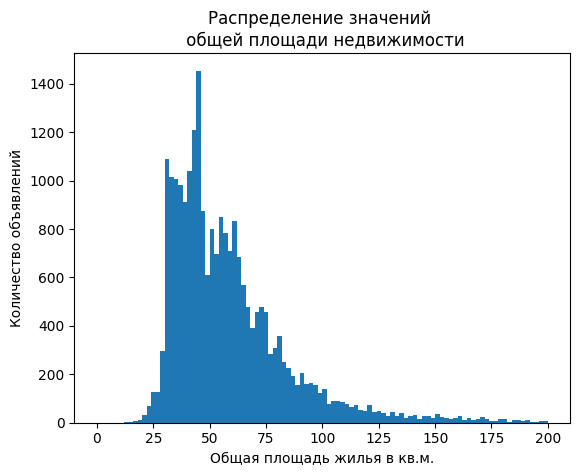

In [34]:
# Построение гистограммы 
plt.hist(df['total_area'], density=False, bins=100, range=(0, 200))
plt.title('Распределение значений \n общей площади недвижимости')
plt.xlabel('Общая площадь жилья в кв.м.')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** На этом графике видно как распределяются значения общей площади квартир. Так как в районе 500 кв.м. значений очень мало, то можно сократить интервал для отображения до 200 кв.м. Видно что большинство данных по квартирам находится в диапазоне от 30 до 100 кв.м.

#### Рассмотрим столбец `living_area`.

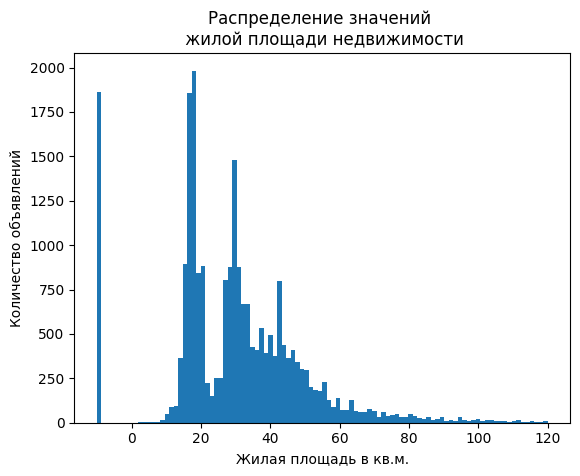

In [35]:
# Построение гистограммы 
plt.hist(df['living_area'].replace('no_info', -10), density=False, bins=100, range=(-10, 120))
plt.title('Распределение значений \n жилой площади недвижимости')
plt.xlabel('Жилая площадь в кв.м.')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** На этом графике видно как распределяются значения жилой площади квартир.
Для построения гистограммы мы заменили значения no_info на -10.
Так как в районе 350 кв.м. значений очень мало, то можно сократить интервал для отображения до 120 кв.м. Видно что большинство данных по квартирам находится в диапазоне от 15 до 60 кв.м. с провалом в районе 20-25 кв.м. Слева около значения -10 мы видим количество квартир по которым данные отсутствуют.

#### Рассмотрим столбец `kitchen_area`.

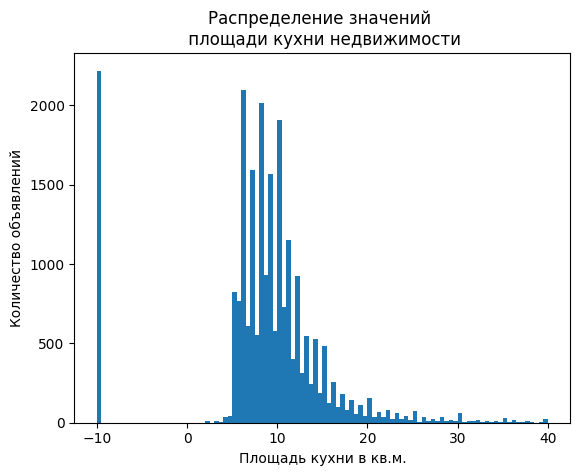

In [36]:
# Построение гистограммы 
plt.hist(df['kitchen_area'].replace('no_info', -10), density=False, bins=100, range=(-10, 40))
plt.title('Распределение значений \n площади кухни недвижимости')
plt.xlabel('Площадь кухни в кв.м.')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** На этом графике видно как распределяются значения площадей кухонь в квартирах.
Для построения гистограммы мы заменили значения no_info на -10.
Так как в районе 150 кв.м. значений очень мало, то можно сократить интервал для отображения до 40 кв.м. Видно что большинство данных по квартирам находится в диапазоне от 15 до 20 кв.м. Слева около значения -10 мы видим количество квартир по которым данные отсутствуют.

#### Рассмотрим столбец `last_price`.

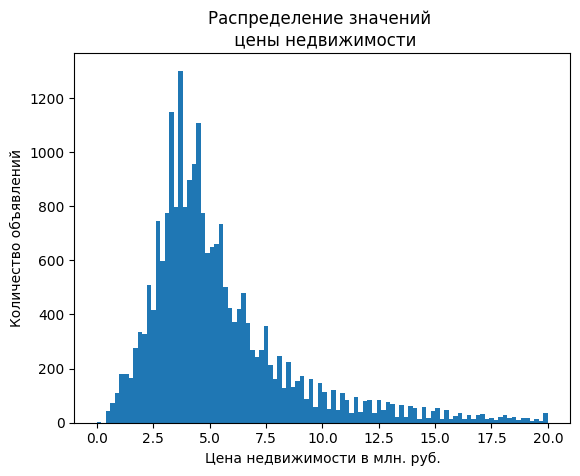

In [37]:
# Построение гистограммы 
plt.hist(df['last_price'] / 1_000_000, density=False, bins=100, range=(0, 20))
plt.title('Распределение значений \n цены недвижимости')
plt.xlabel('Цена недвижимости в млн. руб.')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** На этом графике видно как распределяются данные по ценам квартир.
Так как в районе 100 млн.руб. значений очень мало, то можно сократить интервал для отображения до 20 млн.руб.
Мы видим что большинство квартир стоит от 2 до 10 млн. руб.

#### Рассмотрим столбец `rooms`.

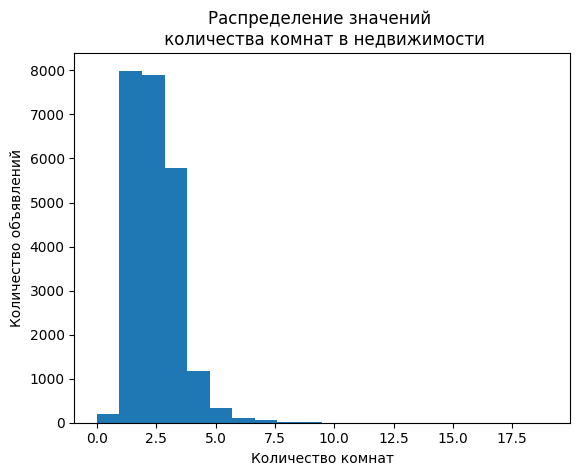

In [38]:
# Построение гистограммы 
plt.hist(df['rooms'], density=False, bins=20)
plt.title('Распределение значений \n количества комнат в недвижимости')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** На этом графике видно как распределяются данные по количеству комнат в квартирах.
Мы видим что большинство квартир имеет от 1 до 4 комнат.

#### Рассмотрим столбец `ceiling_height`.

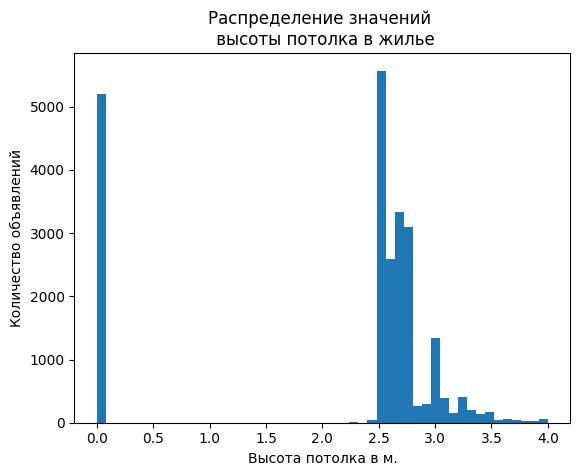

In [39]:
# Построение гистограммы 
plt.hist(df['ceiling_height'].replace('no_info', 0), density=False, bins=50, range=(0, 4))
plt.title('Распределение значений \n высоты потолка в жилье')
plt.xlabel('Высота потолка в м.')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** На этом графике видно как распределяется значения высоты потолка в квартирах. Для построения гистограммы мы заменили значения no_info на 0. 
Так как в районе 6 м. значений очень мало, то можно сократить интервал для отображения до 4 м. Видно что большинство данных по квартирам находится в диапазоне от 2,5 до 2,8 м. Слева около значения 0 мы видим количество квартир по которым данные отсутствуют.

#### Рассмотрим столбец `floor`.

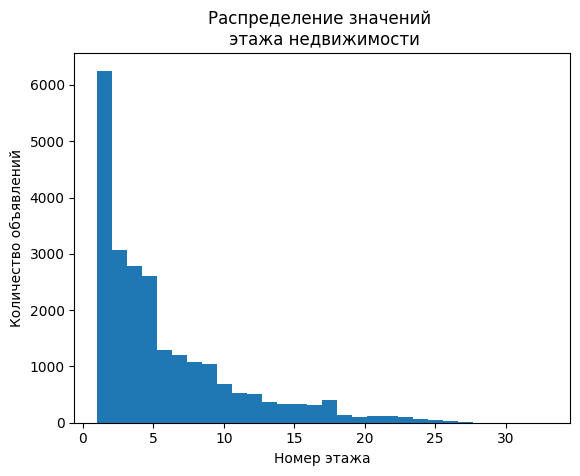

In [40]:
# Построение гистограммы 
plt.hist(df['floor'], density=False, bins=30)
plt.title('Распределение значений \n этажа недвижимости')
plt.xlabel('Номер этажа')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** На этом графике видно как распределяется квартиры по этажам.
Видно что большинство из них находится на первых 10 этажах домов. 

#### Рассмотрим столбец `floors_total`.

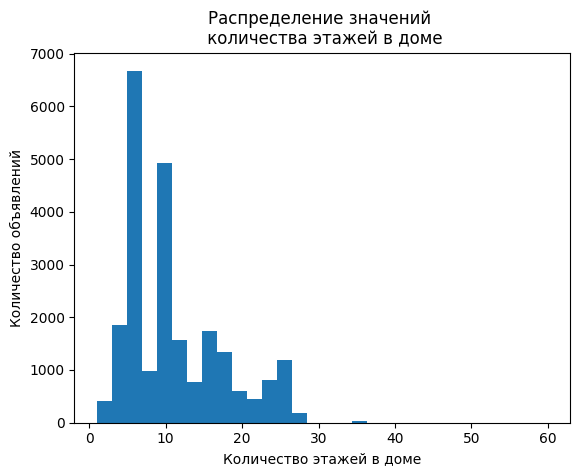

In [41]:
# Построение гистограммы 
plt.hist(df['floors_total'], density=False, bins=30)
plt.title('Распределение значений \n количества этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** На этом графике видно как распределяется этажность домов.
Здесь мы видим, что большинство домов имеют 5 или 10 этажей.

#### Рассмотрим столбец `floor_type`.

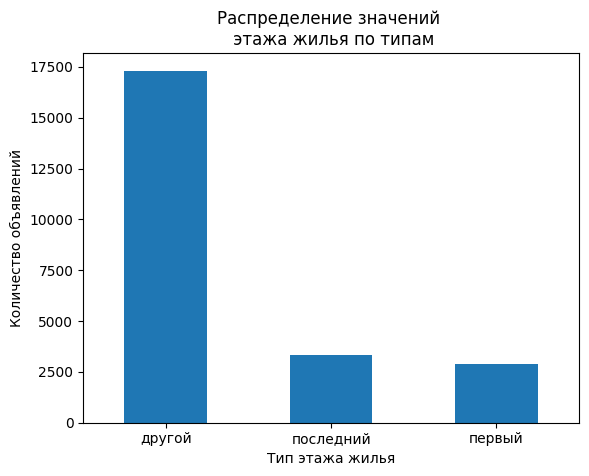

In [42]:
# Построение столбчатого графика
df['floor_type'].value_counts().plot.bar(rot=0)
plt.title('Распределение значений \n этажа жилья по типам')
plt.xlabel('Тип этажа жилья')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** На этом графике видно как распределяются квартиры по типам этажей. Мы видим примерно одинаковое количество продаваемой недвижимости на первом и последних этажах. 

#### Рассмотрим столбец `cityCenters_nearest`.

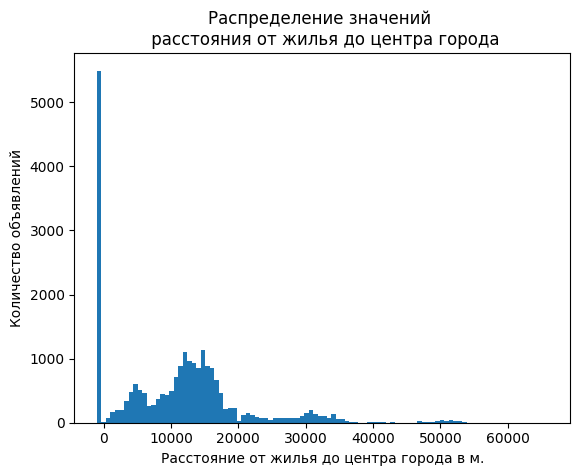

In [43]:
# Построение гистограммы 
plt.hist(df['cityCenters_nearest'].replace('no_info', -1000), density=False, bins=100)
plt.title('Распределение значений \n расстояния от жилья до центра города')
plt.xlabel('Расстояние от жилья до центра города в м.')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** На этом графике видно как распределяются данные на квартиры по расстоянию до центра (в метрах). 
Для построения гистограммы мы заменили значения no_info на -1000.
Большинство недвижимости находится на расстоянии не более 20 км от центра города. Слева около значения -1000 мы видим количество квартир по которым данные отсутствуют.

#### Рассмотрим столбец `airports_nearest`.

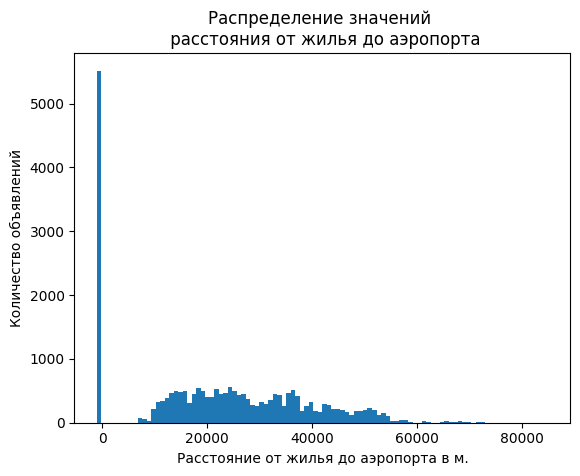

In [44]:
# Построение гистограммы 
plt.hist(df['airports_nearest'].replace('no_info', -1000), density=False, bins=100)
plt.title('Распределение значений \n расстояния от жилья до аэропорта')
plt.xlabel('Расстояние от жилья до аэропорта в м.')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** На этом графике видно как распределяются данные на квартиры по расстоянию до аэропорта (в метрах). 
Для построения гистограммы мы заменили значения no_info на -1000.
Большинство недвижимости находится на расстоянии от 10 до 50 км. Слева около значения -1000 мы видим количество квартир по которым данные отсутствуют.

#### Рассмотрим столбец `parks_nearest`.

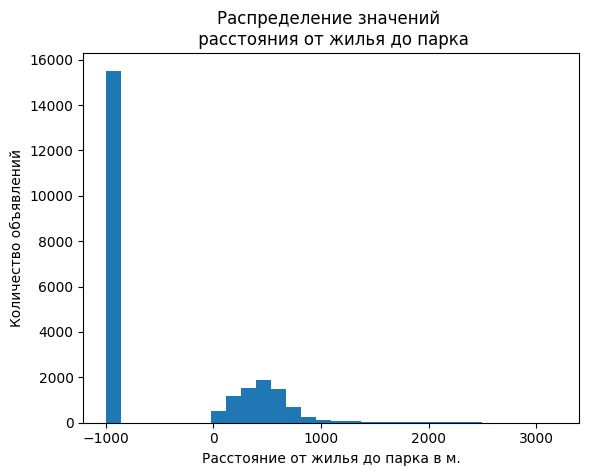

In [45]:
# Построение гистограммы 
plt.hist(df['parks_nearest'].replace('no_info', -1000), density=False, bins=30)
plt.title('Распределение значений \n расстояния от жилья до парка')
plt.xlabel('Расстояние от жилья до парка в м.')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** На этом графике видно как распределяются данные на квартиры по расстоянию до ближайшего парка (в метрах). 
Для построения гистограммы мы заменили значения no_info на -1000.
Большинство недвижимости находится на расстоянии до 1 км. Слева около значения -1000 мы видим количество квартир по которым данные отсутствуют.

#### Рассмотрим столбец `week_day`.

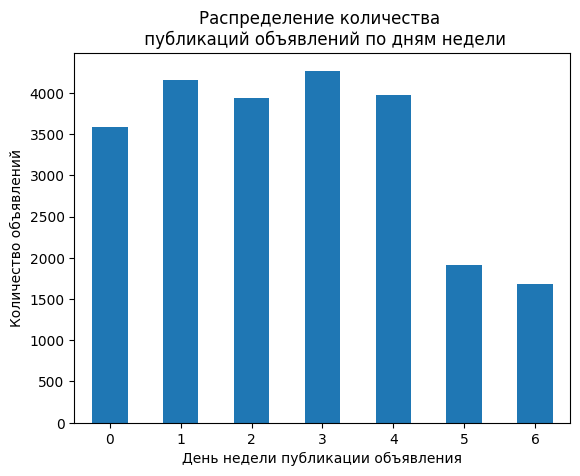

In [46]:
# Построение столбчатого графика 
df['week_day'].value_counts(sort=False).plot.bar(rot=0)
plt.title('Распределение количества \n публикаций объявлений по дням недели')
plt.xlabel('День недели публикации объявления')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** На этом графике видно в какие дни недели размещались объявления о продаже квартир.  
В будние дни объявления размещались равномерно (здесь 0 - понедельник, 1 - вторник и т.д).   На выходных активность продавцов заметно снижалась (здесь 5 - суббота, 6 - воскресенье).

#### Рассмотрим столбец `month`.

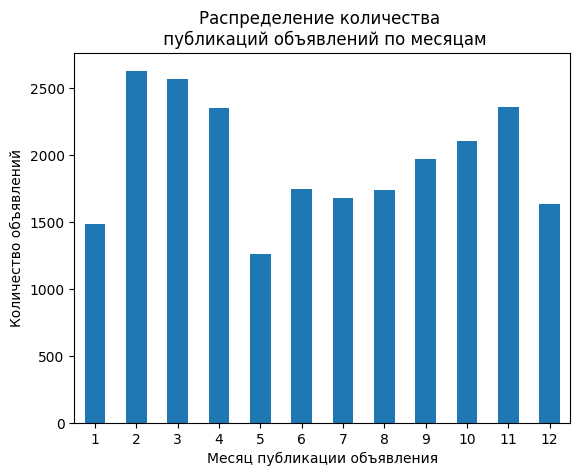

In [47]:
# Построение столбчатого графика 
df['month'].value_counts(sort=False).plot.bar(rot=0)
plt.title('Распределение количества \n публикаций объявлений по месяцам')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** На этом графике видно в какие месяцы размещались объявления о продаже квартир.  
Можно заметить, что самые активные месяцы с февряля (2) по апрель (4), а также ноябрь (11).  
Количество новых объявлений на минимуме в декабре (12), в январе (1) и в мае (5).

### Рассмотрим факторы наиболее влияющие на стоимость объекта.

In [48]:
# Подсчёт количества квартир дороже 100 млн. рублей
len(df[df['last_price'] > 100_000_000])

33

**Замечание:** Так квартир дороже 100 млн. руб. всего 33, то далее при построении графиков учитывать их не будем. Таким образом зависимости между параметрами жилья будут более наглядными.

#### Определим зависимость стоимости объекта от его общей площади.

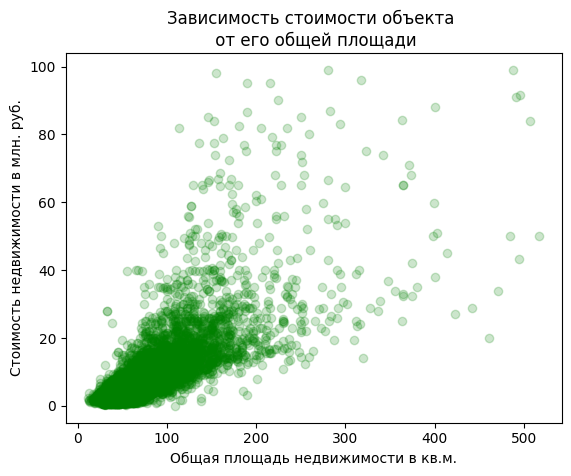

In [49]:
# Построение диаграммы рассеяния
plt.scatter(x=df.loc[df['last_price'] < 100_000_000, 'total_area'],
            y=df.loc[df['last_price'] < 100_000_000, 'last_price'] / 1_000_000,
            color='green',
            alpha=0.2)
plt.title('Зависимость стоимости объекта \n от его общей площади')
plt.xlabel('Общая площадь недвижимости в кв.м.')
plt.ylabel('Стоимость недвижимости в млн. руб.')
plt.show();

**Замечание:** С ростом общей площади квартиры растет и ее цена (что вполне логично).
Однако зависимость не очень сильная.  

**Проанализируем среднюю стоимость недвижимости. Для этого сгруппируем данные по общей площади жилья.**

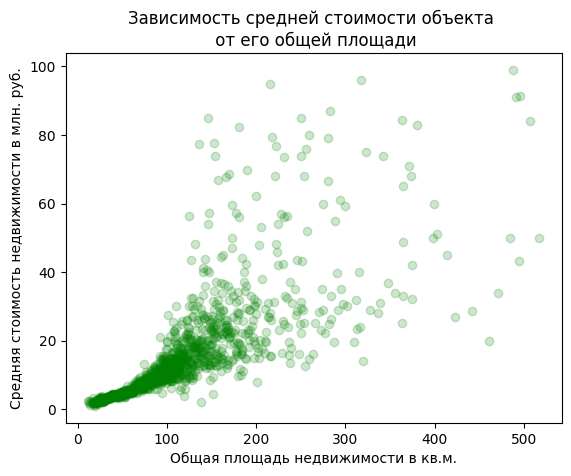

In [50]:
# Создание сводной таблицы (группировка по столбцу "total_area")
df_total_area_price = df.pivot_table(index='total_area', values='last_price', aggfunc=['mean']).reset_index()
# Удаление мультииндекса после группировки
df_total_area_price.columns = df_total_area_price.columns.droplevel(1)
# Построение диаграммы рассеяния
plt.scatter(x=df_total_area_price.loc[df_total_area_price['mean'] < 100_000_000, 'total_area'],
            y=df_total_area_price.loc[df_total_area_price['mean'] < 100_000_000, 'mean'] / 1_000_000,
            color='green',
            alpha=0.2)
plt.title('Зависимость средней стоимости объекта \n от его общей площади')
plt.xlabel('Общая площадь недвижимости в кв.м.')
plt.ylabel('Средняя стоимость недвижимости в млн. руб.')
plt.show();

**Замечание:** Зависимость довольно высокая для квартир с общей площадью менее 100 кв.м. С ростом же площади зависимость заметно снижается.

#### Определим зависимость стоимости объекта от жилой площади.

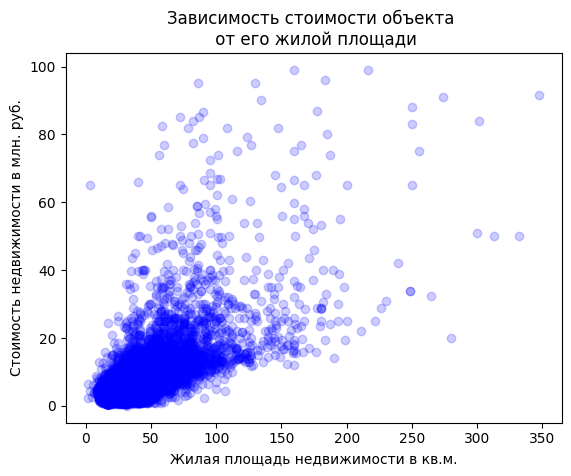

In [51]:
# Построение диаграммы рассеяния
plt.scatter(x=df.loc[(df['last_price'] < 100_000_000) & (df['living_area'] != 'no_info'), 'living_area'],
            y=df.loc[(df['last_price'] < 100_000_000) & (df['living_area'] != 'no_info'), 'last_price'] / 1_000_000,
            color='blue',
            alpha=0.2)
plt.title('Зависимость стоимости объекта \n от его жилой площади')
plt.xlabel('Жилая площадь недвижимости в кв.м.')
plt.ylabel('Стоимость недвижимости в млн. руб.')
plt.show();

**Замечание:** С ростом жилой площади недвижимости растет и ее цена (что вполне логично).
Однако зависимость не очень сильная.  

**Проанализируем среднюю стоимость недвижимости. Для этого сгруппируем данные по жилой площади недвижимости.**

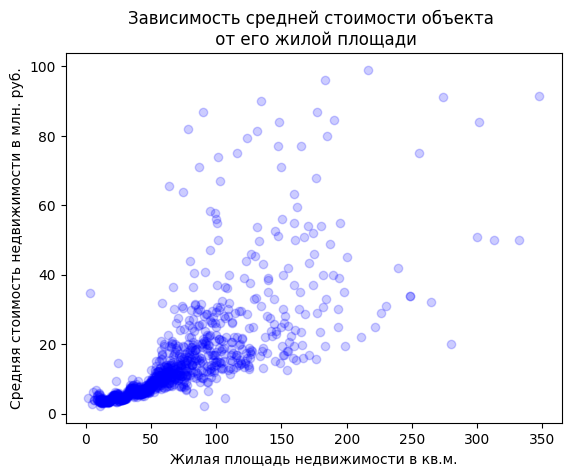

In [52]:
# Создание сводной таблицы (группировка по столбцу "living_area")
df_living_area_price = df.pivot_table(index='living_area', values='last_price', aggfunc=['mean']).reset_index()
# Удаление мультииндекса после группировки
df_living_area_price.columns = df_living_area_price.columns.droplevel(1)
# Построение диаграммы рассеяния
plt.scatter(x=df_living_area_price.loc[(df_living_area_price['mean'] < 100_000_000) &
                                       (df_living_area_price['living_area'] != 'no_info'), 'living_area'],
            y=df_living_area_price.loc[(df_living_area_price['mean'] < 100_000_000) &
                                       (df_living_area_price['living_area'] != 'no_info'), 'mean'] / 1_000_000,
            color='blue',
            alpha=0.2)
plt.title('Зависимость средней стоимости объекта \n от его жилой площади')
plt.xlabel('Жилая площадь недвижимости в кв.м.')
plt.ylabel('Средняя стоимость недвижимости в млн. руб.')
plt.show();

**Замечание:** Зависимость довольно высокая для квартир с жилой площадью менее 50 кв.м. С ростом же площади зависимость заметно снижается.

#### Определим зависимость стоимости объекта от  площади кухни.

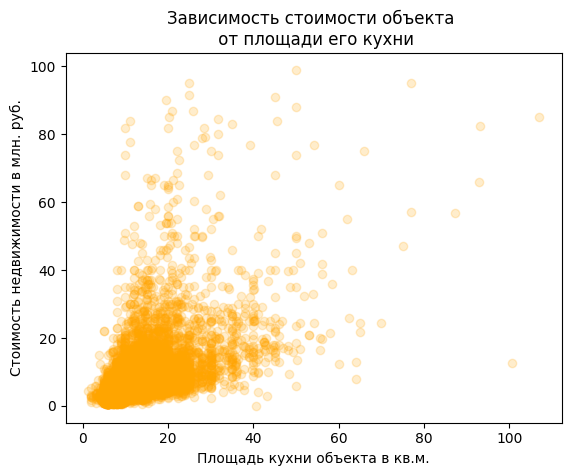

In [53]:
# Построение диаграммы рассеяния
plt.scatter(x=df.loc[(df['last_price'] < 100_000_000) & (df['kitchen_area'] != 'no_info'), 'kitchen_area'],
            y=df.loc[(df['last_price'] < 100_000_000) & (df['kitchen_area'] != 'no_info'), 'last_price'] / 1_000_000,
            color='orange',
            alpha=0.2)
plt.title('Зависимость стоимости объекта \n от площади его кухни')
plt.xlabel('Площадь кухни объекта в кв.м.')
plt.ylabel('Стоимость недвижимости в млн. руб.')
plt.show();

**Замечание:** С ростом площади кухни квартиры растет и ее цена (чем больше кухня, тем больше общая площадь квартиры).
Однако зависимость не очень сильная.  

**Проанализируем среднюю стоимость недвижимости. Для этого сгруппируем данные по площади кухни недвижимости.**

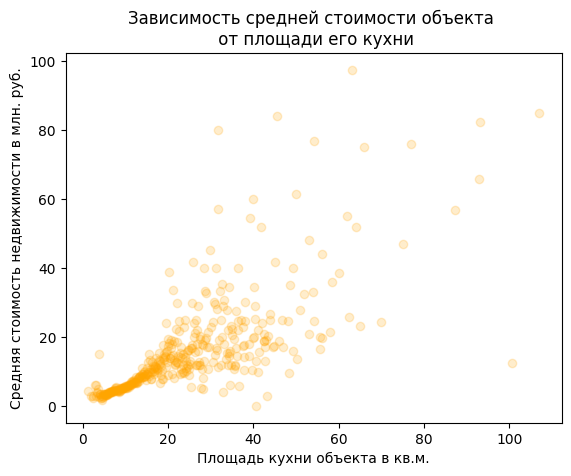

In [54]:
# Создание сводной таблицы (группировка по столбцу "kitchen_area")
df_kitchen_area_price = df.pivot_table(index='kitchen_area', values='last_price', aggfunc=['mean']).reset_index()
# Удаление мультииндекса после группировки
df_kitchen_area_price.columns = df_kitchen_area_price.columns.droplevel(1)
# Построение диаграммы рассеяния
plt.scatter(x=df_kitchen_area_price.loc[(df_kitchen_area_price['mean'] < 100_000_000) &
                                        (df_kitchen_area_price['kitchen_area'] != 'no_info'), 'kitchen_area'],
            y=df_kitchen_area_price.loc[(df_kitchen_area_price['mean'] < 100_000_000) &
                                        (df_kitchen_area_price['kitchen_area'] != 'no_info'), 'mean'] / 1_000_000,
            color='orange',
            alpha=0.2)
plt.title('Зависимость средней стоимости объекта \n от площади его кухни')
plt.xlabel('Площадь кухни объекта в кв.м.')
plt.ylabel('Средняя стоимость недвижимости в млн. руб.')
plt.show();

**Замечание:** Зависимость довольно высокая для квартир с жилой площадью менее 18 кв.м. С ростом же площади зависимость заметно снижается.

#### Определим зависимость стоимости объекта от  количества комнат в квартире.

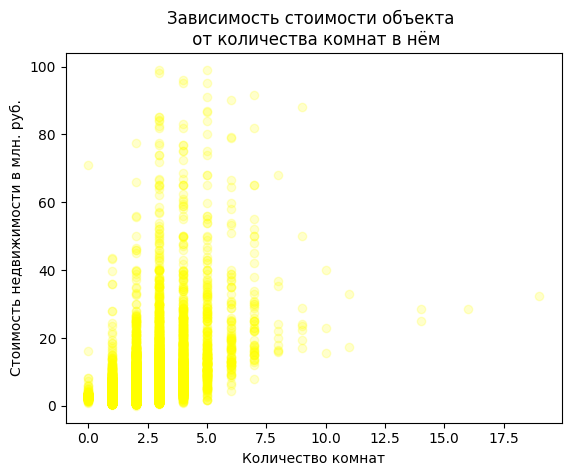

In [55]:
# Построение диаграммы рассеяния
plt.scatter(x=df.loc[df['last_price'] < 100_000_000, 'rooms'],
            y=df.loc[df['last_price'] < 100_000_000, 'last_price'] / 1_000_000,
            color='yellow',
            alpha=0.2)
plt.title('Зависимость стоимости объекта \n от количества комнат в нём')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость недвижимости в млн. руб.')
plt.show();

**Замечание:** Мы видим большой разброс в данных. Здесь сложно сделать какой - либо вывод.  

**Проанализируем среднюю и медианную стоимость недвижимости. Для этого сгруппируем данные по количеству комнат в квартире.**

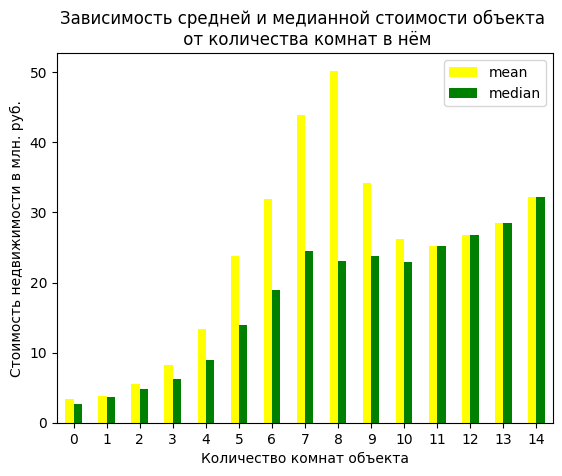

In [56]:
# Создание сводной таблицы (группировка по столбцу "rooms")
df_rooms_price = df.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'median']).reset_index()
# Удаление мультииндекса после группировки
df_rooms_price.columns = df_rooms_price.columns.droplevel(1)
# Округление знчений до 1 млн. руб.
df_rooms_price['mean'] = df_rooms_price['mean'] / 1_000_000
df_rooms_price['median'] = df_rooms_price['median'] / 1_000_000
# Построение столбчатого графика 
df_rooms_price[['mean', 'median']].plot.bar(rot=0, color=['yellow', 'green'])
plt.title('Зависимость средней и медианной стоимости объекта \n от количества комнат в нём')
plt.xlabel('Количество комнат объекта')
plt.ylabel('Стоимость недвижимости в млн. руб.')
plt.show();

In [57]:
# Расчёт корреляции Пирсона  
df_rooms_price.corr()

,rooms,mean,median
rooms,1.000000,0.591505,0.927053
mean,0.591505,1.000000,0.824409
median,0.927053,0.824409,1.000000


**Замечание:** С ростом количества комнат в  квартире растет и ее цена (чем больше комнат в квартире, тем больше общая площадь квартиры).
Корреляция медианного значения намного выше по сравнению со средним. Это объясняется аномально высокими значениями цен в некоторых квартирах с 5-10 комнатами. 
Здесь медиана лучше показывает зависимость.

#### Определим зависимость стоимости объекта от  этажа на котором он расположен (первый, последний, другой).

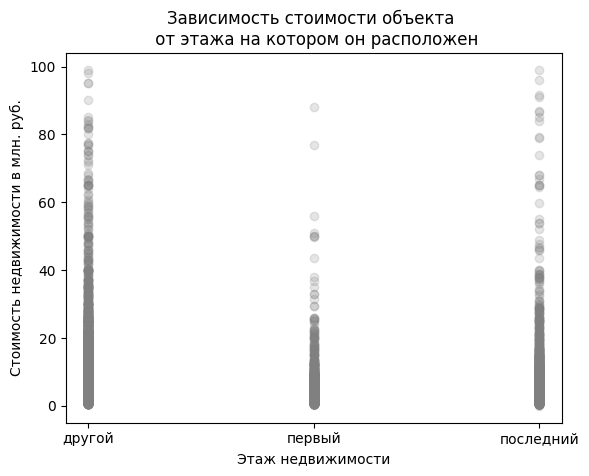

In [58]:
# Построение диаграммы рассеяния
plt.scatter(x=df.loc[df['last_price'] < 100_000_000, 'floor_type'],
            y=df.loc[df['last_price'] < 100_000_000, 'last_price'] / 1_000_000,
            color='gray',
            alpha=0.2)
plt.title('Зависимость стоимости объекта \n от этажа на котором он расположен')
plt.xlabel('Этаж недвижимости')
plt.ylabel('Стоимость недвижимости в млн. руб.')
plt.show();

**Замечание:** Мы видим большой разброс в данных. Заметим, что на первом этаже в основном квартиры дешевле.  

**Проанализируем среднюю и медианную стоимость недвижимости. Для этого сгруппируем данные по этажу на котором находится объект.**

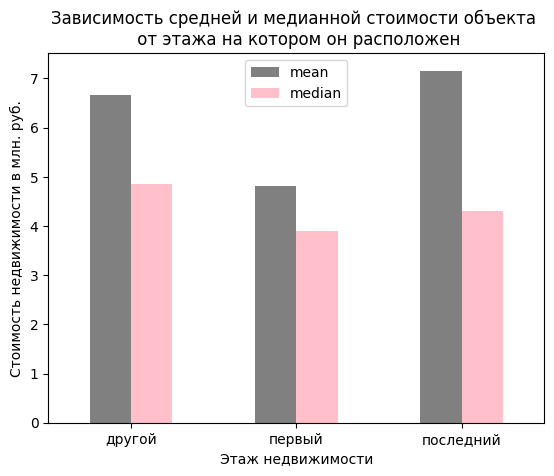

In [59]:
# Создание сводной таблицы (группировка по столбцу "floor_type")
df_floor_type_price = df.pivot_table(index='floor_type', values='last_price', aggfunc=['mean', 'median'])
# Удаление мультииндекса после группировки
df_floor_type_price.columns = df_floor_type_price.columns.droplevel(1)
# Округление знчений до 1 млн. руб.
df_floor_type_price['mean'] = df_floor_type_price['mean'] / 1_000_000
df_floor_type_price['median'] = df_floor_type_price['median'] / 1_000_000
# Построение столбчатого графика 
df_floor_type_price[['mean', 'median']].plot.bar(rot=0, color=['gray', 'pink'])
plt.title('Зависимость средней и медианной стоимости объекта \n от этажа на котором он расположен')
plt.xlabel('Этаж недвижимости')
plt.ylabel('Стоимость недвижимости в млн. руб.')
plt.show();

**Замечание:** Среднее цена для квартир на последнем этаже самая высокая. Скорее всего, это из-за элитной недвижимости расположенной там (двухуровневые квартиры, "пентхаусы").   
Медиана очень хорошо показывает взаимосвязь.
Самые дешевые квартиры расположены на первом этаже. Цена на квартиры расположенные на последнем этаже немного выше. Квартиры расположенные на других этажах традиционно дороже.

#### Определим зависимость стоимости объекта от времени размещения объявления (день недели, месяц, год).

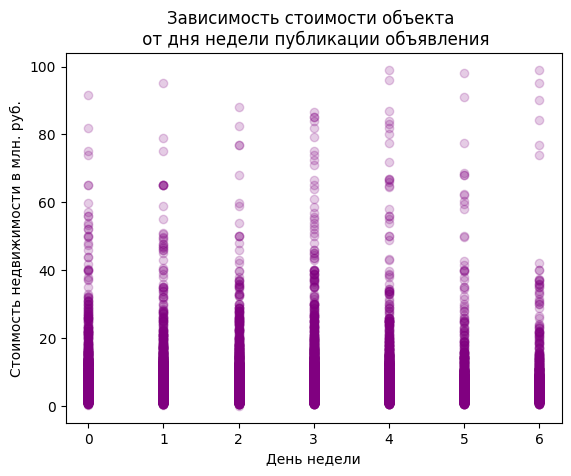

In [60]:
# Построение диаграммы рассеяния
plt.scatter(x=df.loc[df['last_price'] < 100_000_000, 'week_day'],
            y=df.loc[df['last_price'] < 100_000_000, 'last_price'] / 1_000_000,
            color='purple',
            alpha=0.2)
plt.title('Зависимость стоимости объекта \n от дня недели публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Стоимость недвижимости в млн. руб.')
plt.show();

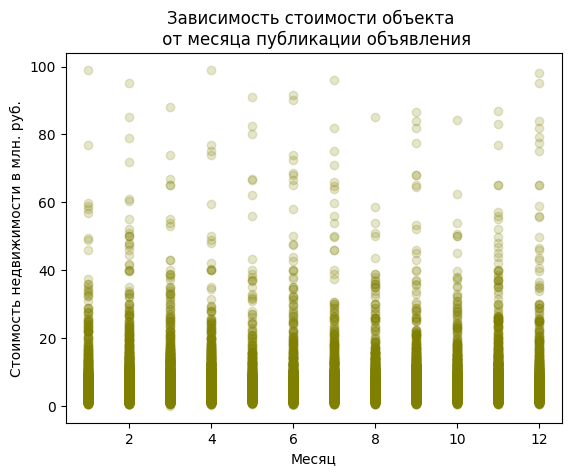

In [61]:
# Построение диаграммы рассеяния
plt.scatter(x=df.loc[df['last_price'] < 100_000_000, 'month'],
            y=df.loc[df['last_price'] < 100_000_000, 'last_price'] / 1_000_000,
            color='olive',
            alpha=0.2)
plt.title('Зависимость стоимости объекта \n от месяца публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Стоимость недвижимости в млн. руб.')
plt.show();

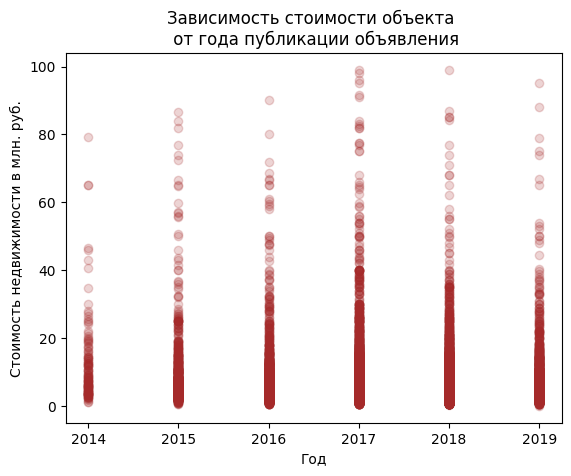

In [62]:
# Построение диаграммы рассеяния
plt.scatter(x=df.loc[df['last_price'] < 100_000_000, 'year'],
            y=df.loc[df['last_price'] < 100_000_000, 'last_price'] / 1_000_000,
            color='brown',
            alpha=0.2)
plt.title('Зависимость стоимости объекта \n от года публикации объявления')
plt.xlabel('Год')
plt.ylabel('Стоимость недвижимости в млн. руб.')
plt.show();

**Замечание:** Мы видим большой разброс в данных. 

**Проанализируем среднюю и медианную стоимость недвижимости. Для этого сгруппируем данные по времени публикации объявления.**

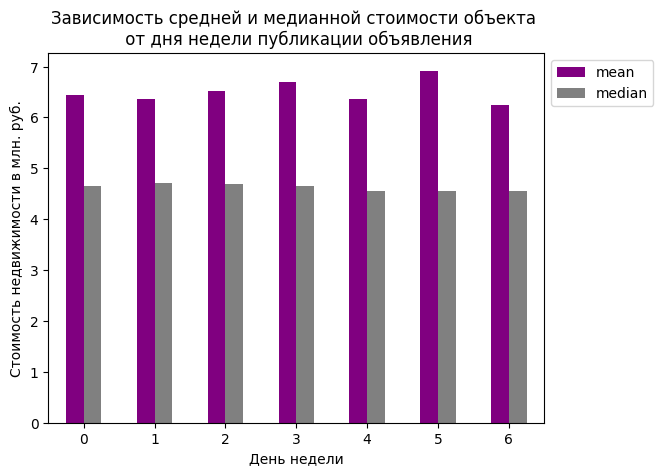

In [63]:
# Создание сводной таблицы (группировка по столбцу "week_day")
df_week_day_price = df.pivot_table(index='week_day', values='last_price', aggfunc=['mean', 'median'])
# Удаление мультииндекса после группировки
df_week_day_price.columns = df_week_day_price.columns.droplevel(1)
# Округление знчений до 1 млн. руб.
df_week_day_price['mean'] = df_week_day_price['mean'] / 1_000_000
df_week_day_price['median'] = df_week_day_price['median'] / 1_000_000
# Построение столбчатого графика 
df_week_day_price[['mean', 'median']].plot.bar(rot=0, color=['purple', 'gray'])
plt.title('Зависимость средней и медианной стоимости объекта \n от дня недели публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Стоимость недвижимости в млн. руб.')
plt.legend(bbox_to_anchor=(1, 1))
plt.show();

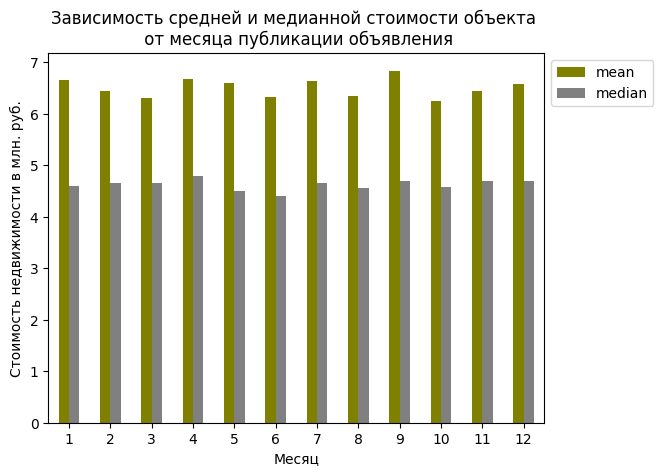

In [64]:
# Создание сводной таблицы (группировка по столбцу "month")
df_month_price = df.pivot_table(index='month', values='last_price', aggfunc=['mean', 'median'])
# Удаление мультииндекса после группировки
df_month_price.columns = df_month_price.columns.droplevel(1)
# Округление знчений до 1 млн. руб.
df_month_price['mean'] = df_month_price['mean'] / 1_000_000
df_month_price['median'] = df_month_price['median'] / 1_000_000
# Построение столбчатого графика 
df_month_price[['mean', 'median']].plot.bar(rot=0, color=['olive', 'gray'])
plt.title('Зависимость средней и медианной стоимости объекта \n от месяца публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Стоимость недвижимости в млн. руб.')
plt.legend(bbox_to_anchor=(1, 1))
plt.show();

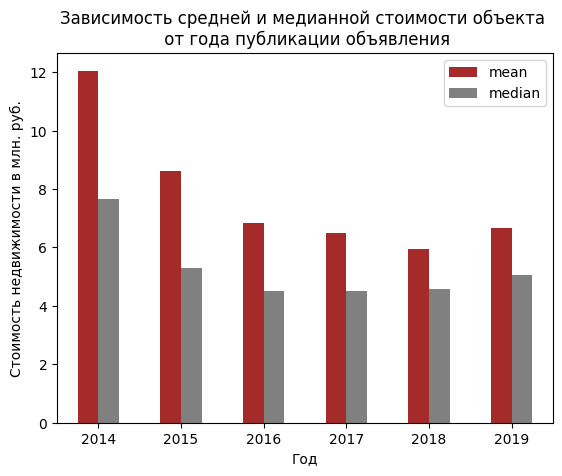

In [65]:
# Создание сводной таблицы (группировка по столбцу "year")
df_year_price = df.pivot_table(index='year', values='last_price', aggfunc=['mean', 'median'])
# Удаление мультииндекса после группировки
df_year_price.columns = df_year_price.columns.droplevel(1)
# Округление знчений до 1 млн. руб.
df_year_price['mean'] = df_year_price['mean'] / 1_000_000
df_year_price['median'] = df_year_price['median'] / 1_000_000
# Построение столбчатого графика 
df_year_price[['mean', 'median']].plot.bar(rot=0, color=['brown', 'gray'])
plt.title('Зависимость средней и медианной стоимости объекта \n от года публикации объявления')
plt.xlabel('Год')
plt.ylabel('Стоимость недвижимости в млн. руб.')
plt.show();

**Замечание:**
Значения цены (среднее и медианное) очень слабо зависит от дня недели или месяца размещения объявления.   
А вот в данных по годам различие заметно. Начиная с 2014 года цены начали снижаться. В 2019 начался рост цен на недвижимость.

### Узнаем, как быстро продавались квартиры.

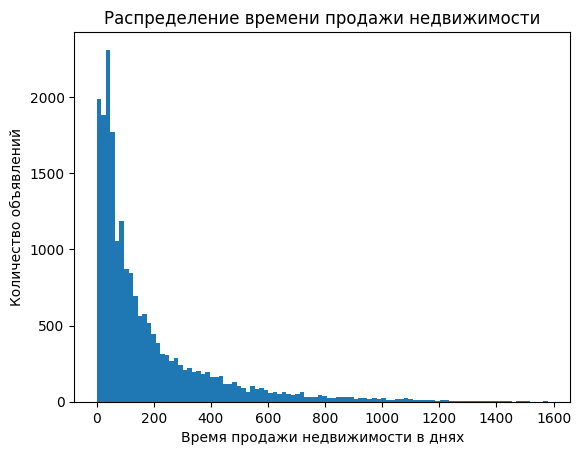

Среднее значение: 180.78196632798313
Медиана: 95.0


1.0       1
2.0       3
3.0     157
4.0     174
5.0     152
6.0     123
7.0     234
8.0     138
9.0     142
10.0    127
Name: days_exposition, dtype: int64

In [66]:
# Построение гистограммы 
plt.hist(df.loc[df['days_exposition'] != 'no_info', 'days_exposition'], density=False, bins=100)
plt.title('Распределение времени продажи недвижимости')
plt.xlabel('Время продажи недвижимости в днях')
plt.ylabel('Количество объявлений')
plt.show();
# Нахождение среднего значения
print('Среднее значение:', df.loc[df['days_exposition'] != 'no_info', 'days_exposition'].mean())
# Нахождение медианы
print('Медиана:', df.loc[df['days_exposition'] != 'no_info', 'days_exposition'].median())
# Вывод распределения данных в виде таблицы
df.loc[df['days_exposition'] != 'no_info', 'days_exposition'].value_counts().sort_index().head(10)

**Замечание:** Среднее количество дней на продажу составляет 180. Медиана всех значений равна 95.
Разница очень большая. Вероятно на среднее значение оказывают большое влияние "выбросы".  
**Рассмотрим интервал значений от 0 до 600.**

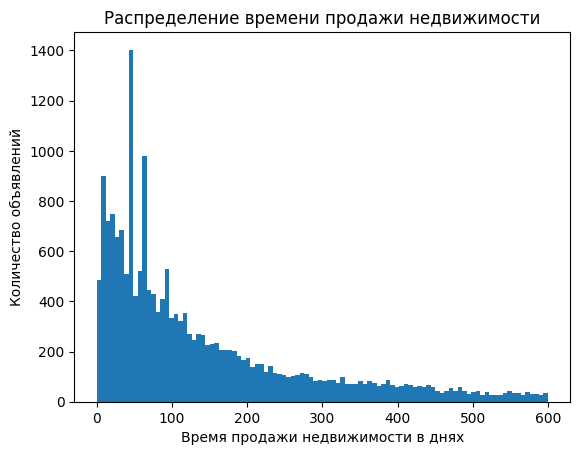

In [67]:
# Построение гистограммы 
plt.hist(df.loc[df['days_exposition'] != 'no_info', 'days_exposition'], density=False, bins=100, range=(0, 600))
plt.title('Распределение времени продажи недвижимости')
plt.xlabel('Время продажи недвижимости в днях')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** В большинстве случаев продажа не длится больше 600 дней. Мы имеем данные опродажах (157), которые длятся 3 дня, следовательно их мы и примем за "очень" быстрые. Слишком долгими можно принять продажи, которые длятся более 600 дней.  
**Далее рассмотрим интервал значений от 0 до 100.**

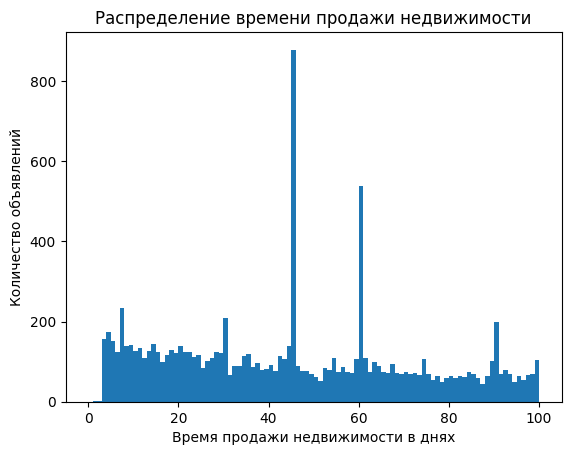

In [68]:
# Построение гистограммы 
plt.hist(df.loc[df['days_exposition'] != 'no_info', 'days_exposition'], density=False, bins=100, range=(0, 100))
plt.title('Распределение времени продажи недвижимости')
plt.xlabel('Время продажи недвижимости в днях')
plt.ylabel('Количество объявлений')
plt.show();

**Замечание:** Если рассмотреть диапазон от 0 до 100 дней, то мы можем увидеть пики на 30, 45, 60 и 90 дней. Вероятно это как то может быть связано с работой риэлторов. Возможно они больше стараются заключить сделки к концу месяца, чтобы получить премию.

Также, наверняка, это связано с системой размещения объявлений на портале Яндекс.Недвижимость. Там в зависимости от стоимости недвижимости установленны сроки публикации объявления.   
Например для жилья стоимостью до 4,5 млн. руб. он составляет 45 дней. Поэтому мы видим, что очень много объявлений находится в публикации 45 дней, после этого их снимают с портала.

### Найдем населенные пункты с самой высокой и низкой стоимостью квадратного метра.
Для анализа возьмем 10 населенных пунктов с наибольшим количеством объявлений.

In [69]:
# Создание сводной таблицы с группировкой по столбцу "locality_name"
df_top10_locality = (df.groupby('locality_name').agg({'locality_name':'count','price_for_1m': 'mean'})
                                                .rename({'locality_name': 'n_records'},axis=1)
                                                .sort_values(by='n_records',ascending=False)
                                                .round().head(10))
# Вывод таблицы на экран
df_top10_locality.head(10)

,n_records,price_for_1m
locality_name,,
Санкт-Петербург,15636,114784.0
Мурино,586,86041.0
Кудрово,469,95261.0
Шушары,439,78552.0
Всеволожск,397,68720.0
Пушкин,369,103126.0
Колпино,338,75424.0
Парголово,327,90177.0
Гатчина,307,68746.0


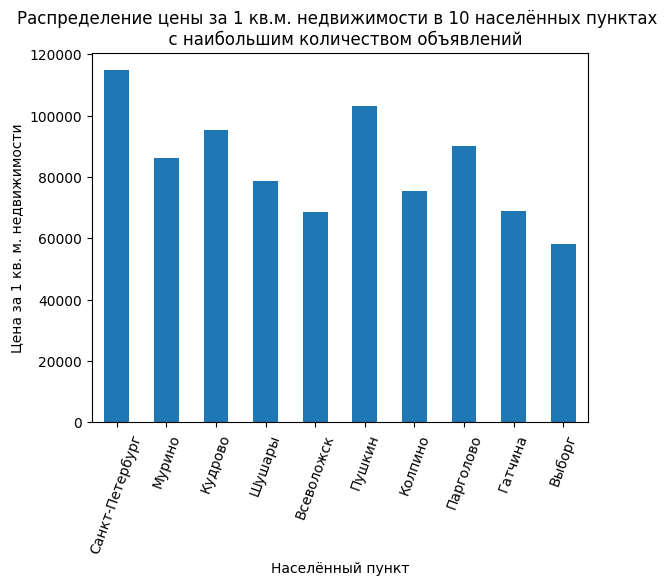

In [70]:
# Построение столбчатого графика 
df_top10_locality['price_for_1m'].plot.bar(rot=70)
plt.title('Распределение цены за 1 кв.м. недвижимости в 10 населённых пунктах \n  с наибольшим количеством объявлений')
plt.xlabel('Населённый пункт')
plt.ylabel('Цена за 1 кв. м. недвижимости')
plt.show();

**Замечание:** Среди 10 населенных пунктов с наибольшим количеством данных самая высокая стоимость 1 квадратного метра в Санкт-Петербурге, а самая низкая в Выборге.

### Найдем зависимость стоимости объекта от расстояния до центра города Санкт-Петербург.

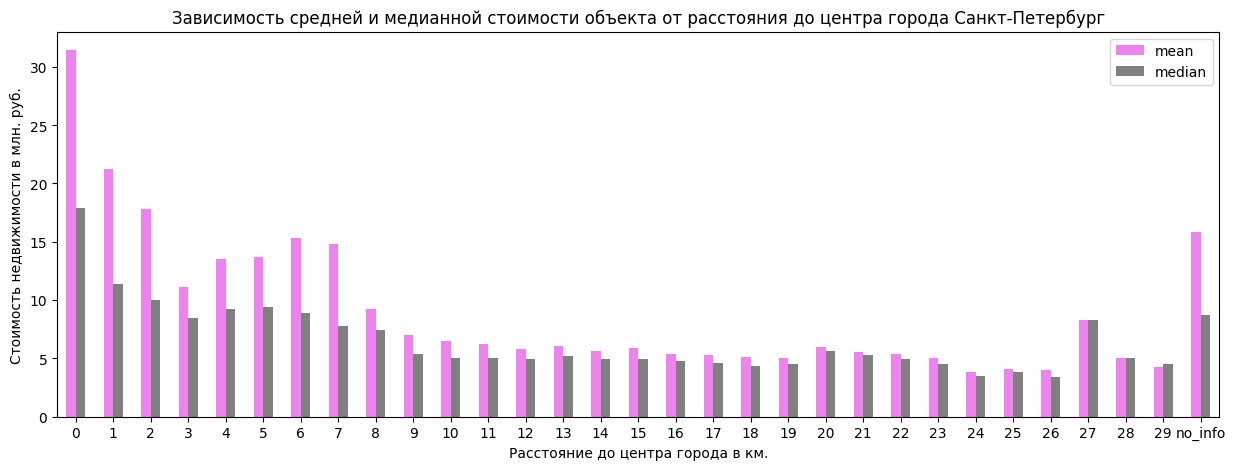

In [71]:
# Создание сводной таблицы (группировка по столбцу "cityCenters_nearest_km")
df_spb_price = df[df['locality_name'] == 'Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km',
                                                                        values='last_price',
                                                                        aggfunc=['mean', 'median'])
# Удаление мультииндекса после группировки
df_spb_price.columns = df_spb_price.columns.droplevel(1)
# Округление знчений до 1 млн. руб.
df_spb_price['mean'] = df_spb_price['mean'] / 1_000_000
df_spb_price['median'] = df_spb_price['median'] / 1_000_000
# Построение столбчатого графика 
df_spb_price[['mean', 'median']].plot.bar(rot=0, color=['violet', 'gray'], figsize=(15, 5))
plt.title('Зависимость средней и медианной стоимости объекта от расстояния до центра города Санкт-Петербург')
plt.xlabel('Расстояние до центра города в км.')
plt.ylabel('Стоимость недвижимости в млн. руб.')
plt.show();

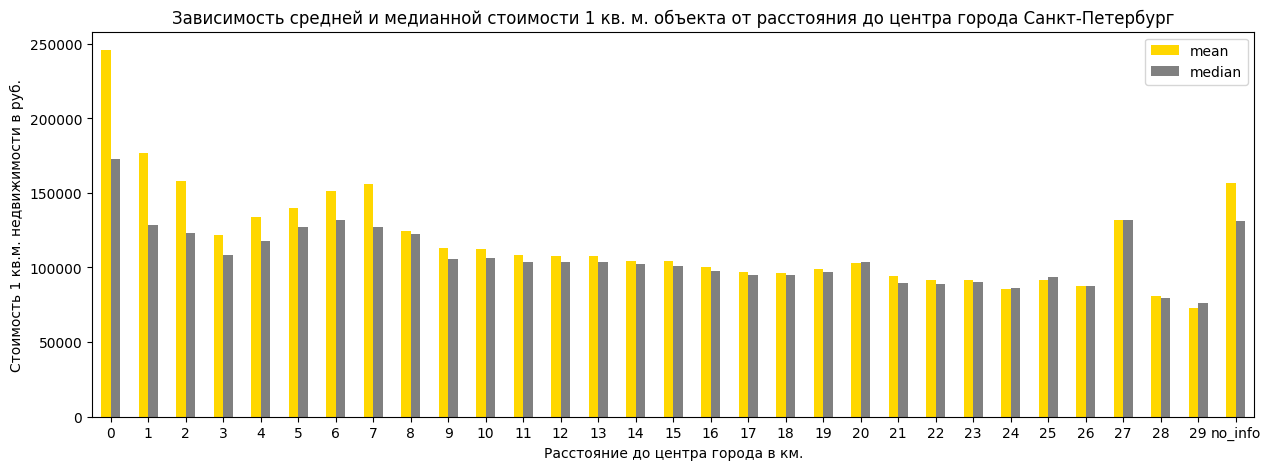

In [72]:
# Создание сводной таблицы (группировка по столбцу "cityCenters_nearest_km")
df_spb_price_for_1m = df[df['locality_name'] == 'Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km',
                                                                               values='price_for_1m',
                                                                               aggfunc=['mean', 'median'])
# Удаление мультииндекса после группировки
df_spb_price_for_1m.columns = df_spb_price_for_1m.columns.droplevel(1)
# Построение столбчатого графика 
df_spb_price_for_1m[['mean', 'median']].plot.bar(rot=0, color=['gold', 'gray'], figsize=(15, 5))
plt.title('Зависимость средней и медианной стоимости 1 кв. м. объекта от расстояния до центра города Санкт-Петербург')
plt.xlabel('Расстояние до центра города в км.')
plt.ylabel('Стоимость 1 кв.м. недвижимости в руб.')
plt.show();

**Замечание:** Чем ближе к центру тем дороже недвижимость. Конечно существуют и исключения. например на расстоянии 27 км от центра недвижимость довольно дорогая. Возможно там находится элитный район.  
Можно предположить, что центральный район города заканчивается на 7-ом километре.

## Общий вывод

В данном проекте мы исследовали данные сервиса Яндекс Недвижимость— архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

**На первом этапе мы изучили данные.**

**Во второй части проекта мы выполнили предобработку данных.**
* Изменили тип данных там, где это нужно.
* Удалили строки с аномальными значениями в столбце с высотой потолков.
* Заполнили пропуски там где это возможно и не повлияло на проводимые исследования.
* Обработали неявные дубликаты в столбце с названиями локаций.


**В третьей части проекта мы добавили столбцы со следующими параметрами:**
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах.

**На последнем этапе мы провели исследовательский анализ данных.**

1. Изучили основные параметры объектов, построили гистограммы распределения.


2. Выяснили какие факторы больше всего влияют на общую (полную) стоимость объекта.  
   Сделали вывод, что площадь сильнее всего влияет на объекты размером менее 100 кв.м. Цены на большие квартиры довольно сильно разнятся. Похожая ситуация наблюдается с жилой площадью и полощадью кухни. Это объясняется прямой зависимостью между этими тремя параметрами (общая площадь, жилая площадь и площадь кухни).  
   Также вполне логично, что с ростом количества комнат в квартире растёт и её цена (объясняется увеличением площади жилья).   
   Далее мы убедились, что на первом и последнем этажах квартиры дешевле, хотя и с некоторым исключением.  
   Кроме этого, мы узнали, что день недели и месяц публикации объявления не влияют на цену. А вот год, что вполне объяснимо, влияет на цену недвижимости.  


3. Изучили, как быстро продавались квартиры. Большинство из них продаются в течение 600 дней.


4. Выделили населённые пункты с самой высокой и низкой стоимостью квадратного метра (Санкт-Петербург и Выборг соответственно).


5. Выделили квартиры в Санкт-Петербурге и вычислили среднюю цену каждого километра. Описали, как стоимость объектов зависит от расстояния до центра города.